Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "양동훈"
COLLABORATORS = "python"

---

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

# Exercise: Initial Value Problem and Boundary Value Problem
**강좌**: *Numerical Analysis*

**Due**: 2024/12/19

## Problem 1  

Write code to solve the initial value problem (for a scalar variable) using the following numerical methods:  

1. Explicit Euler Method  
2. Second-Order Runge-Kutta Method (Richardson)  
3. Fourth-Order Runge-Kutta Method  

Additionally, use the implemented methods to solve the **paratrooper problem** presented in the lecture notes.  

### Requirements:  
- Implement each method in Python as a separate function.  
- Test your implementations on the paratrooper problem with the given initial conditions and parameters.  
- Compare the numerical solutions by varying the time step ($h$) as follows:  
  - $h = 0.5, 1.0, 2.0, 5.0, 10.0, 15.0$
- Discuss how the choice of time step affects the accuracy and stability of the solutions.  

In [3]:
# Write Explicit Euler
def explicit_euler(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h) 
    t = np.insert(t, len(t), tspan[1])

    y = np.empty_like(t)
    y[0] = y0

    for i , ti in enumerate(t) :
        if i < len(y) - 1:
            y[i+1] = y[i] + h*f(ti, y[i])
    return t, y

In [5]:
# Write 2nd-order Runge Kutta
def runge_kutta2(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h) 
    t = np.insert(t, len(t), tspan[1])

    y = np.empty_like(t)
    y[0] = y0
    for i, ti in enumerate(t):
        if i < len(y) - 1:
            k1 = f(ti, y[i])
            k2 = f(ti + 3/4*h, y[i] + 3/4*k1*h)
            y[i+1] = y[i] + h*(k1 + 2*k2)/3
            
    return t, y

In [6]:
# Write 4th-order Runge Kutta
def runge_kutta4(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h) 
    t = np.insert(t, len(t), tspan[1])

    y = np.empty_like(t)
    y[0] = y0

    for i, ti in enumerate(t) :
        if i < len(y) - 1:
            k1 = f(ti, y[i])
            k2 = f(ti + 1/2*h, y[i] + 1/2*k1*h)
            k3 = f(ti + 1/2*h, y[i] + 1/2*k2*h)
            k4 = f(ti + h, y[i] + k3*h)
            y[i+1] = y[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6

    return t, y

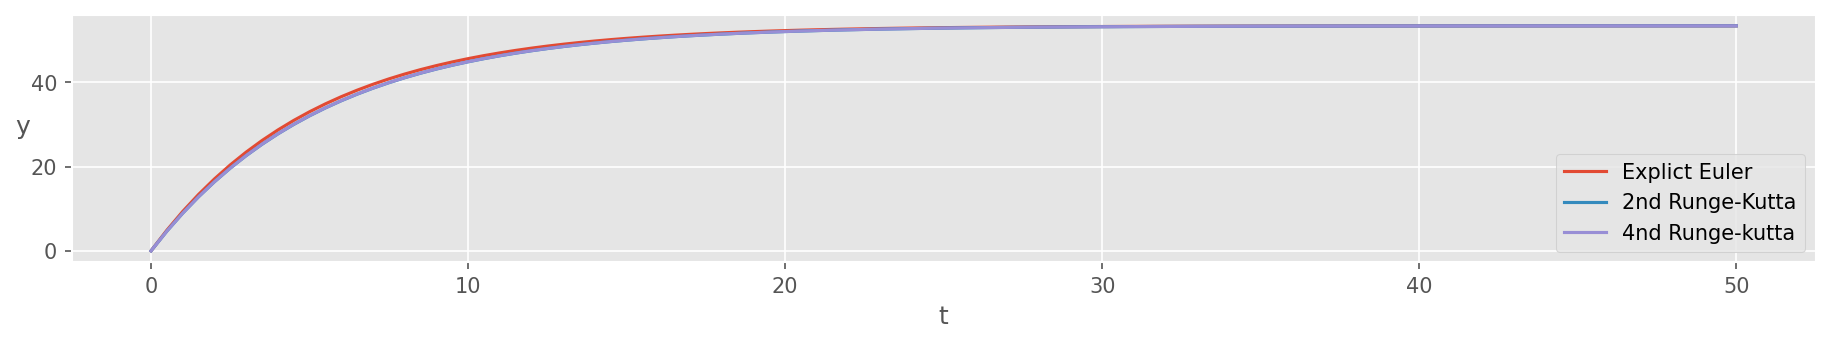

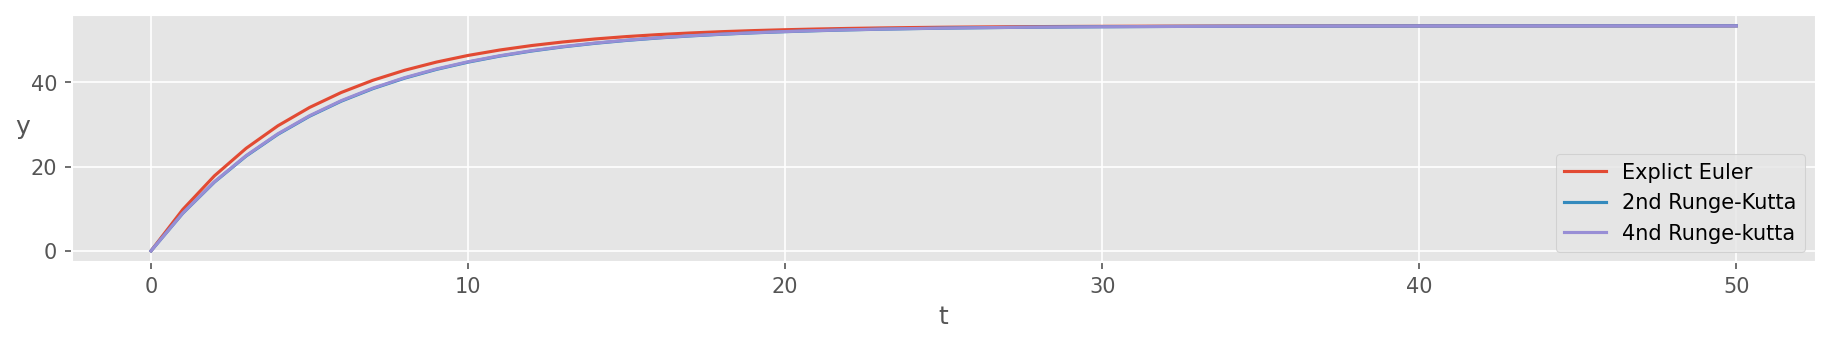

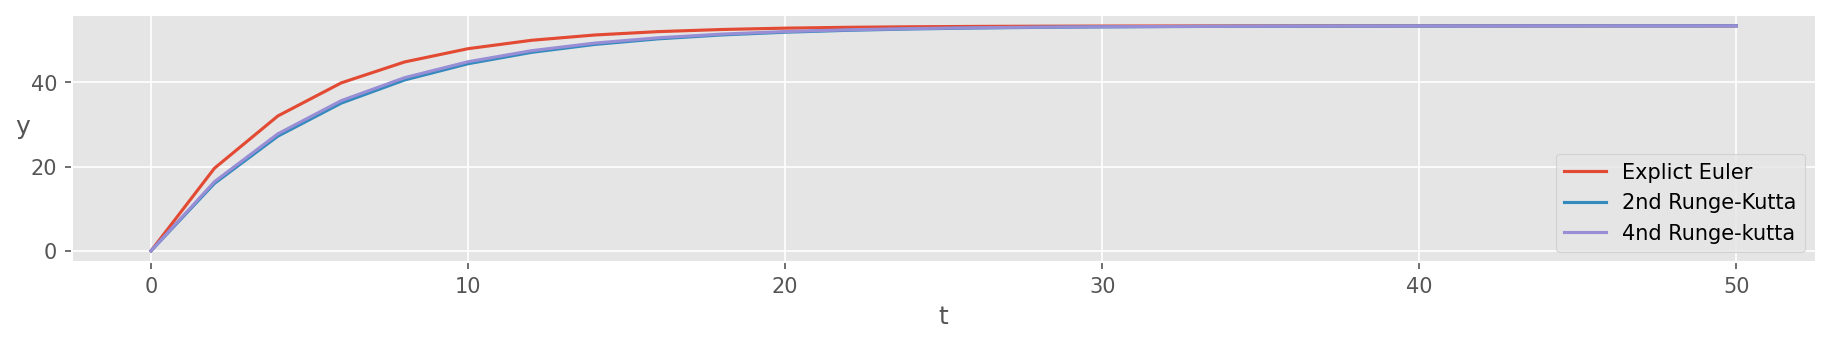

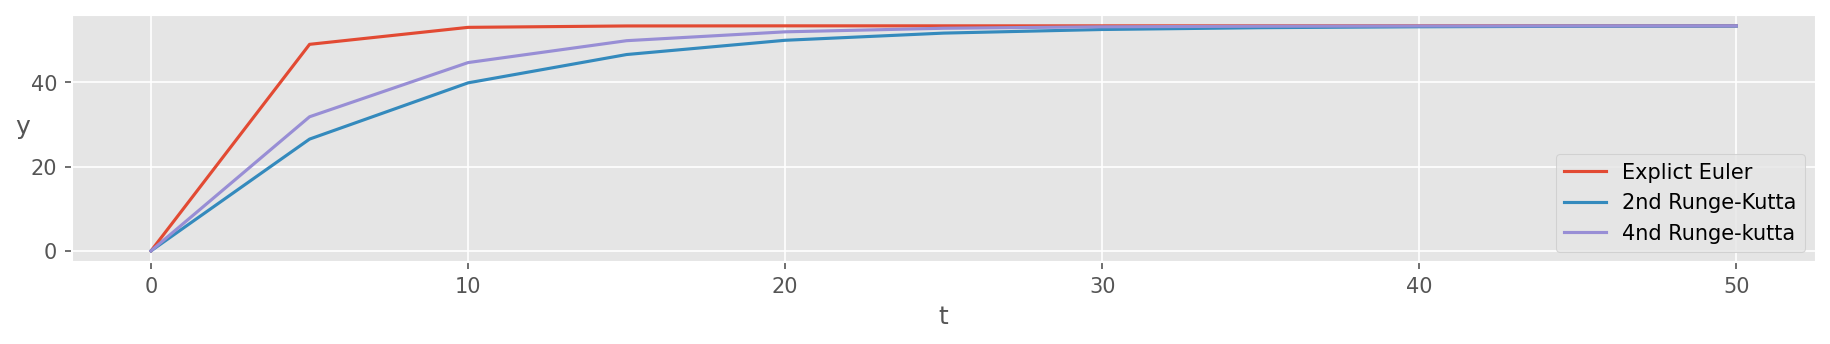

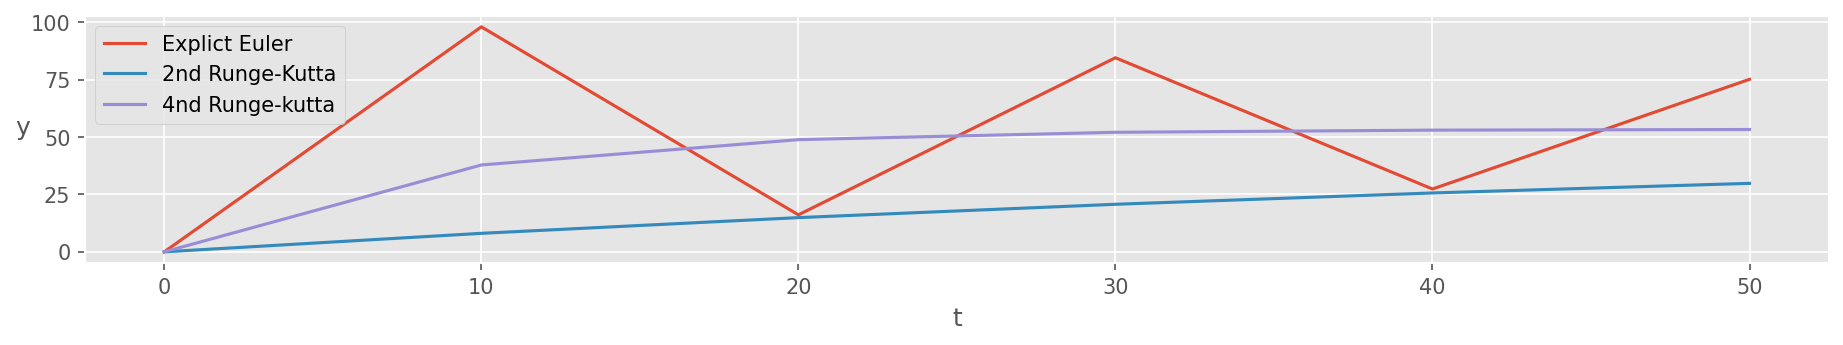

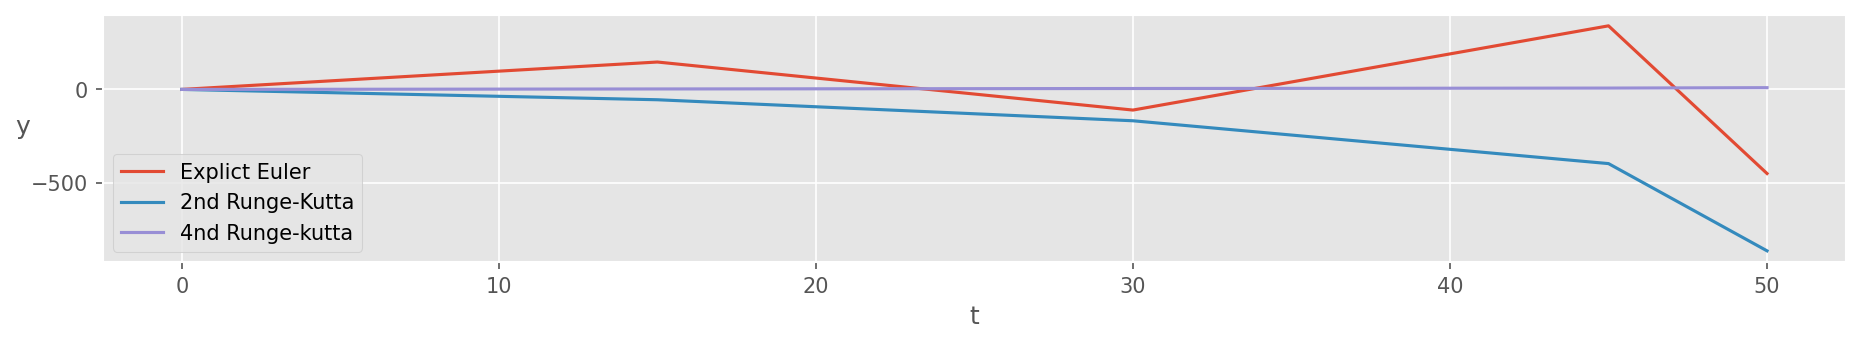

In [20]:
import numpy as np

# Paratrooper problem
m, c, g = 68.1, 12.5, 9.81

# function
def f(t, v):
    return g - c/m*v

# Time step
h = 2.0
eet, eey = explicit_euler(f, (0, 50), 0, h)
r2t, r2y = runge_kutta2(f, (0, 50), 0, h)
r4t, r4y = runge_kutta4(f, (0, 50), 0, h)

# Verification
# Plot exact solution and numerical solution

h_list = [0.5, 1.0, 2.0, 5.0, 10.0, 15.0]

for i in range(len(h_list)) :
    eet, eey = explicit_euler(f, (0, 50), 0, h_list[i])
    r2t, r2y = runge_kutta2(f, (0, 50), 0, h_list[i])
    r4t, r4y = runge_kutta4(f, (0, 50), 0, h_list[i])
    plt.figure(figsize=(15,15))
    plt.subplot(6,1,i+1)
    plt.plot(eet, eey, label = 'Explict Euler')
    plt.plot(r2t, r2y, label = '2nd Runge-Kutta')
    plt.plot(r4t, r4y, label = '4nd Runge-kutta')
    plt.xlabel('t')
    plt.ylabel("y",rotation = 0)
    plt.legend()
    plt.show()

In [8]:
# Check your solution
assert r4y[25] - 53.439347 < 1e-6

## Problem 2  

Write code to solve the initial value problem (for a vector variable) using the following numerical methods:  

1. Explicit Euler Method  
2. Second-Order Runge-Kutta Method (Richardson)  
3. Fourth-Order Runge-Kutta Method  

Use the implemented methods to solve the **spring-mass problem** described in the lecture notes.  

### Requirements:  
- Implement each method in Python as a separate function to handle vector-valued problems.  
- Apply the methods to solve the spring-mass problem with the given initial conditions and parameters. 
- Compare the numerical solutions by varying the time step ($h$) as follows:  
  - $h = 0.01, 0.05, 0.1, 0.2$
- Compare the results for the different methods, analyzing accuracy and stability.  

In [28]:
# Write Explicit Euler (for vector y)
def explicit_euler(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h) 
    t = np.insert(t, len(t), tspan[1])

    y = np.empty((len(y0), len(t)))
    y[:,0] = y0

    for i , ti in enumerate(t) :
        if i < len(t) - 1:
            y[:, i+1] = y[:,i] + h*f(ti, y[:,i])
    return t, y

In [29]:
# Write 2nd-order Runge Kutta (for vector y)
def runge_kutta2(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h) 
    t = np.insert(t, len(t), tspan[1])

    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0
    for i, ti in enumerate(t):
        if i < len(t) - 1:
            k1 = f(ti, y[:,i])
            k2 = f(ti + 3/4*h, y[:,i] + 3/4*k1*h)
            y[:, i+1] = y[:, i] + h*(k1 + 2*k2)/3
            
    return t, y

In [30]:
# Write 4th-order Runge Kutta (for vector y)
def runge_kutta4(f, tspan, y0, h):
    """
    Explicit Euler Method
    
    Parameter
    ---------
    f : function
        Derivative
    tspan : tuple
        Initial and final time ex) (ti, te)
    y0 : float
        Initial solution
    h: float
        Time step size
        
    Return
    ------
    t : array
        Time series
    y : array
        solutions
    """
    # YOUR CODE HERE
    t = np.arange(tspan[0], tspan[1], h) 
    t = np.insert(t, len(t), tspan[1])

    y = np.empty((len(y0), len(t)))
    y[:, 0] = y0

    for i, ti in enumerate(t) :
        if i < len(t) - 1:
            k1 = f(ti, y[:,i])
            k2 = f(ti + 1/2*h, y[:,i] + 1/2*k1*h)
            k3 = f(ti + 1/2*h, y[:,i] + 1/2*k2*h)
            k4 = f(ti + h, y[:,i] + k3*h)
            y[:,i+1] = y[:,i] + h*(k1 + 2*k2 + 2*k3 + k4)/6

    return t, y

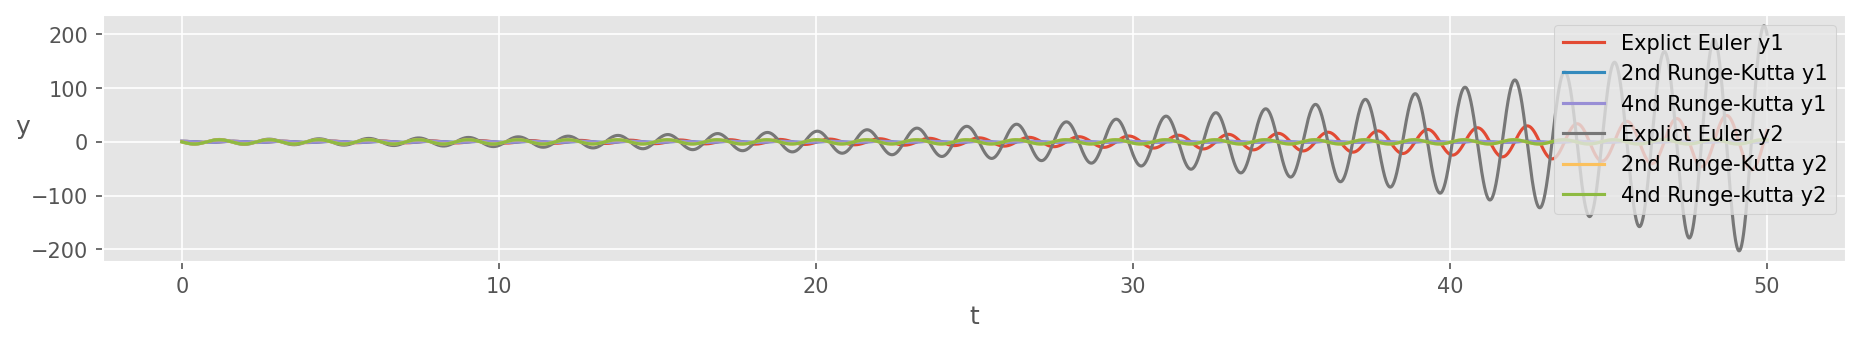

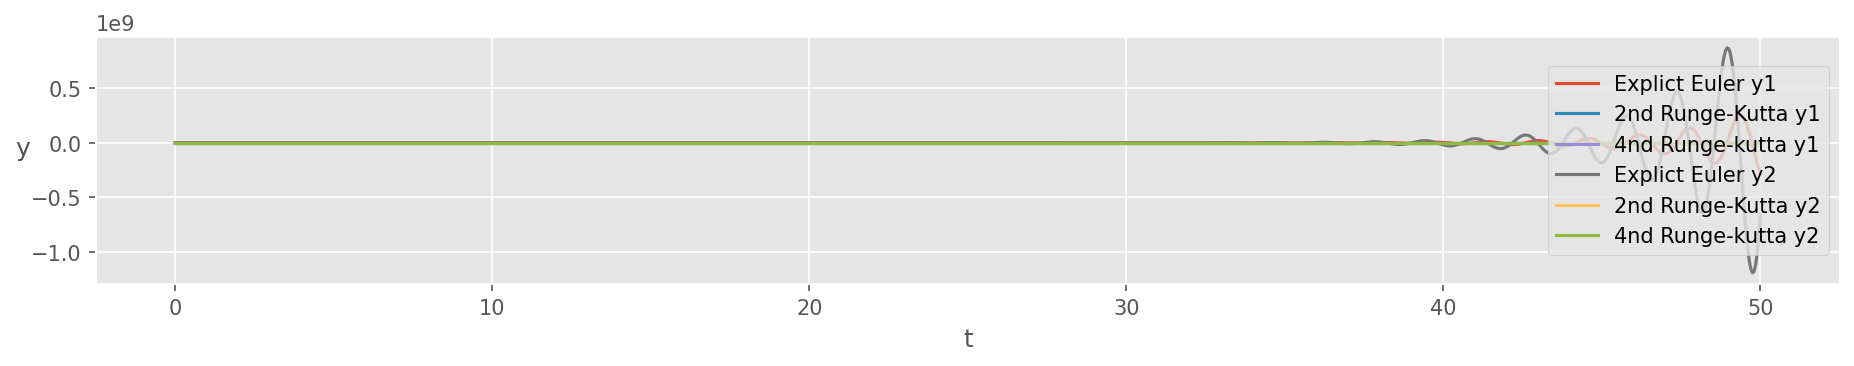

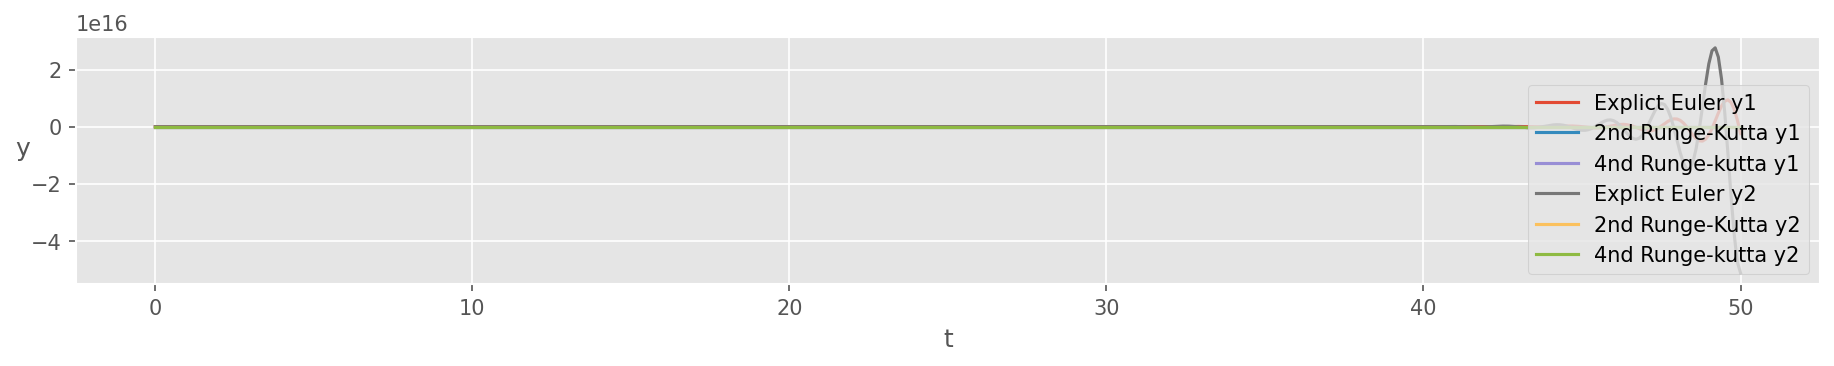

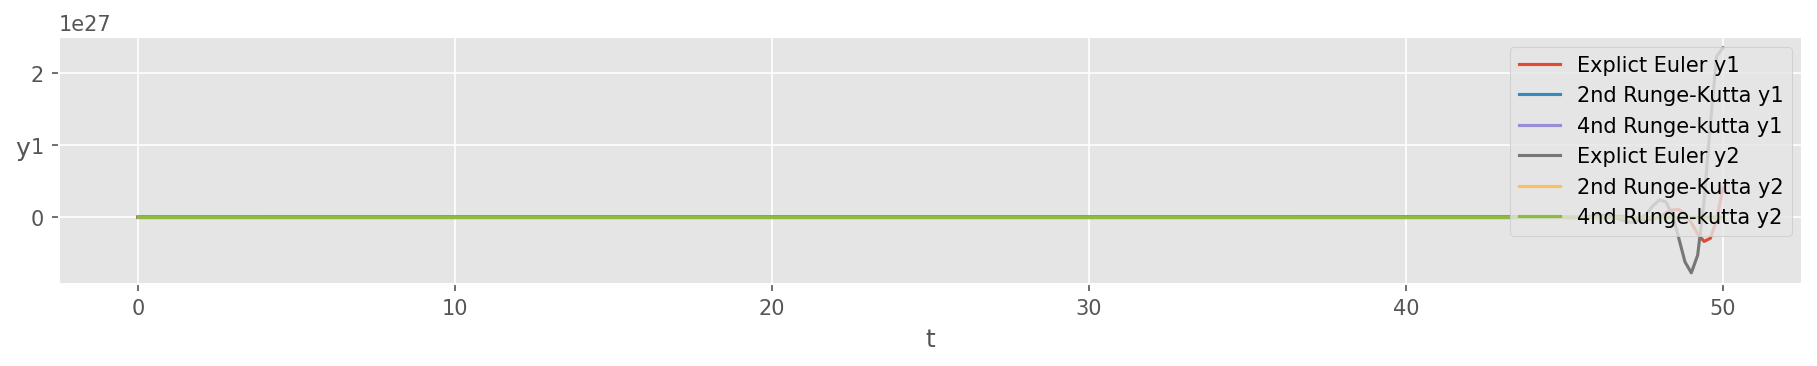

In [38]:
# Paratrooper problem
m, k = 1, 16

# Derivative
def f(t, y):
    return np.array([y[1], -k/m*y[0]])

# Initial condition
y0 = np.array([1, 0])

# Time step
h = 0.05
eet, eey = explicit_euler(f, (0, 5), y0, h)
r2t, r2y = runge_kutta2(f, (0, 5), y0, h)
r4t, r4y = runge_kutta4(f, (0, 5), y0, h)

# Verification
# Plot exact solution and numerical solution
h_list = [0.01, 0.05, 0.1, 0.2]

for i in range(len(h_list)) :
    eet, eey = explicit_euler(f, (0, 50), y0, h_list[i])
    r2t, r2y = runge_kutta2(f, (0, 50), y0, h_list[i])
    r4t, r4y = runge_kutta4(f, (0, 50), y0, h_list[i])
    plt.figure(figsize=(15,15))
    plt.subplot(6,1,i+1)
    plt.plot(eet, eey[0], label = 'Explict Euler y1')
    plt.plot(r2t, r2y[0], label = '2nd Runge-Kutta y1')
    plt.plot(r4t, r4y[0], label = '4nd Runge-kutta y1')
    plt.plot(eet, eey[1], label = 'Explict Euler y2')
    plt.plot(r2t, r2y[1], label = '2nd Runge-Kutta y2')
    plt.plot(r4t, r4y[1], label = '4nd Runge-kutta y2')
    plt.xlabel('t')
    plt.ylabel("y",rotation = 0)
    plt.legend()
    plt.show()

In [32]:
# Check your solution
assert r4y[0, 100] - 0.408303 < 1e-6

## Problem 3  

A forced damped spring-mass system is described by the following nonlinear ordinary differential equation of motion:  

$$
m \frac{d^2 x}{dt^2} + a \left| \frac{dx}{dt} \right| \frac{dx}{dt} + kx = F_o \sin (\omega t)
$$  

where:  
- $x(t)$: Displacement from equilibrium.  
- $t$: Time.  
- $m = 2 \, \text{kg} $: Mass.  
- $ a = 5 \, \text{N}/(\text{m/s})^2 $: Damping coefficient (nonlinear air damping).  
- $ k = 6 \, \text{N/m} $: Spring stiffness.  
- $F_o = 2.5 \, \text{N} $: Amplitude of the forcing function.  
- $ \omega = 0.5 \, \text{rad/sec} $: Angular frequency of the forcing function.  

### Initial Conditions  
- Initial velocity: $ \frac{dx}{dt} = 0 \, \text{m/s} $.  
- Initial displacement: $ x = 1 \, \text{m} $.  

### Task  
Solve the equation numerically using the **4th-order Runge-Kutta method** over the time period $0 \leq t \leq 15 \, \text{s} $.  


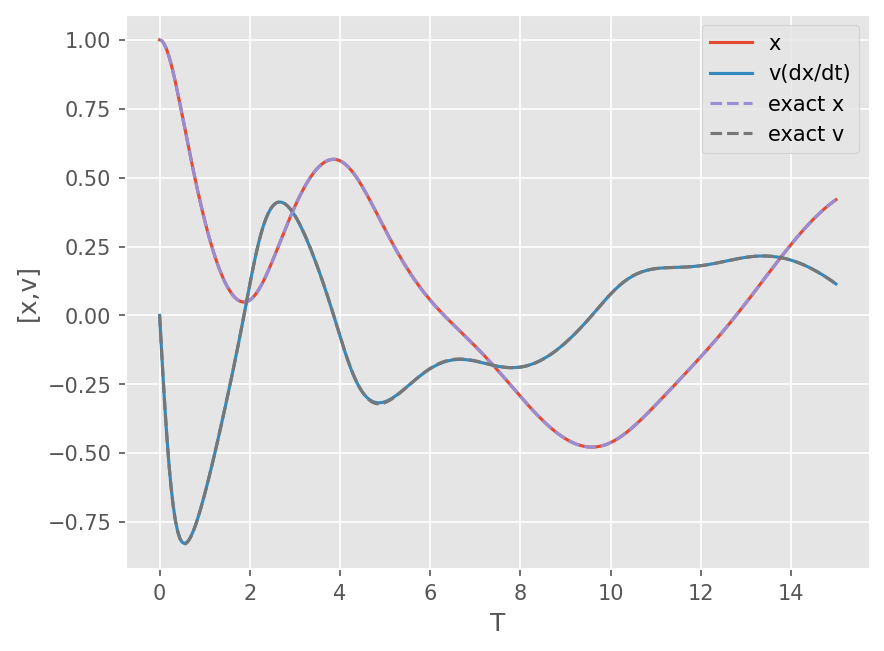

In [49]:
# YOUR CODE HERE
from scipy.integrate import solve_ivp
a =5 
m =2
k =6 
F0 = 2.5
w = 0.5
y0 = np.array([1, 0])
def dxdt(t, y) : 
    return np.array([y[1], -a/m*np.abs(y[1])*y[1]-k/m*y[0]+F0/m*np.sin(w*t)])

r4t1, r4y1 = runge_kutta4(dxdt, (0, 15), y0, 0.05)

t_eval = np.linspace(0,15, 1001)

exact = solve_ivp(dxdt, (0, 15), y0 ,t_eval = t_eval )

# Verification
# Plot exact solution and numerical solution
plt.plot(r4t1,r4y1[0], label = 'x')
plt.plot(r4t1,r4y1[1], label = 'v(dx/dt)')
plt.plot(exact.t,exact.y[0] ,linestyle = '--', label = 'exact x')
plt.plot(exact.t,exact.y[1],linestyle = '--', label = 'exact v')
plt.xlabel('T')
plt.ylabel('[x,v]')
plt.grid(True)
plt.legend()
plt.show()

In [50]:
# Check your solution
assert r4y1[0, 100] - 0.711351 < 1e-6

## Problem 4
Repeat the boundary value problem (BVP) example provided in the lecture notes using the **shooting method**. Implement the **4th-order Runge-Kutta method** instead of using the `solve_ivp` function.  

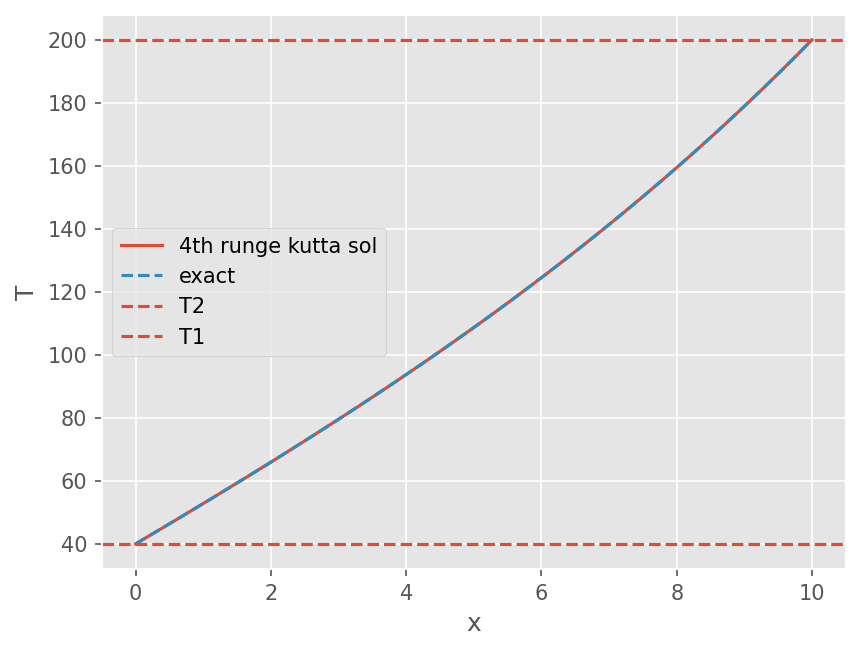

In [58]:
from scipy.optimize import root_scalar


# Constants
Ta, T1, T2 = 20, 40, 200
h = 0.01

# derivative function
def dydx(t, y):
    # y[0], y[1] : T and z
    return np.array([y[1], h*(y[0] - Ta)])

# YOUR CODE HERE
def obj(z) :
    r4t, r4y = runge_kutta4(dydx, (0,10), y0=[T1, z], h = 0.01)
    return r4y[0][-1] - T2

root = root_scalar(obj, bracket=[0, 20])
z0_correct = root.root
t, y = runge_kutta4(dydx, (0,10), y0 = [T1, z0_correct], h = 0.01)

def exact(x):
    return 73.4523*np.exp(0.1*x) - 53.4523*np.exp(-0.1*x) + 20

x = np.linspace(0, 10, 101)

plt.plot(t, y[0], label = '4th runge kutta sol')
plt.plot(x, exact(x), linestyle = '--', label = 'exact')
plt.axhline(200, label = 'T2', linestyle ='--')
plt.axhline(40, label = 'T1', linestyle = '--')
plt.legend()
plt.xlabel('x')
plt.ylabel('T')
plt.grid(True)
plt.show()

In [59]:
# Check your solution
assert y[1, 1000] - 21.932798 < 1e-6

## Problem 5
The boundary layer velocity profile can be obtained by solving the Blasius equation:  

$$
2 f''' +f f'' =0
$$

### Boundary Conditions 
- $f(0) = 0, f'(0)=0$
- $f'(\infty)=1$

Using the shooting method, solve this problem by assuming the initial condition of $f''(0)$.

### Tasks  
1. **Problem Setup**:  
   - Solve the equation using the **shooting method** on $x\in[0, 10]$.  
   - Assume an initial guess for $f''(0)$ and iteratively refine it to satisfy the boundary condition $f'(10) = 1$.   

2. **Analysis**:  
   - Compute and plot the velocity profile $f'(x)$.  
   - Determine the boundary layer thickness, defined as the location where $f'(x)$ reaches 99% of the free-stream velocity (i.e., $f'(x) = 0.99$).  

자유류의 99%만큼 회복하는 지점 = 4.91


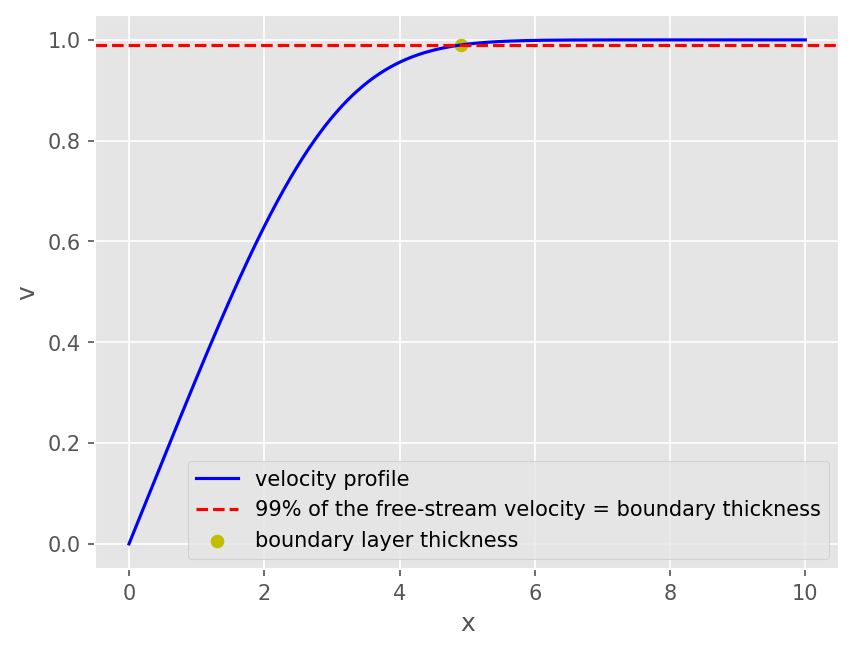

In [100]:
# YOUR CODE HERE
def dfdx(t, f) :
    return np.array([f[1], f[2], -0.5*f[0]*f[2]])

f0 = 0 
fp0 = 0
fp10 = 1
h = 0.01 
#fpp0는 0~0.5 사이에 존재할 것이다.

def obj(z) :
    r4x, r4f = runge_kutta4(dfdx, (0, 10), [f0, fp0, z], h)
    return r4f[1][-1] - fp10

root = root_scalar(obj, bracket=[0,0.5])
fpp0 = root.root

x , f = runge_kutta4(dfdx, (0,10), [f0,fp0,fpp0], h)

def find_boundary(f, tol = 1e-6) :
    for i in range(len(f)) :
        if abs(f[i] - 0.99) < tol :
            return i

boundary_condition = x[find_boundary(f[1])]
print(f'자유류의 99%만큼 회복하는 지점 = {boundary_condition}')
# Plot numerical solution save the result as f
plt.plot(x, f[1], label = 'velocity profile', color = 'b')
plt.axhline(0.99, label = '99% of the free-stream velocity = boundary thickness',linestyle ='--',color = 'red')
plt.scatter(boundary_condition, f[1][find_boundary(f[1])], label = 'boundary layer thickness', color ='y')
plt.xlabel("x")
plt.ylabel('v')
plt.grid(True)
plt.legend()
plt.show()

In [81]:
# Check your solution
assert np.linalg.norm(f[:, 100] - [0.16557173, 0.32978003, 0.32300712]) < 1e-6